<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Part-2/blob/main/notebooks/2_2_networks_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networks Visualization 
Network or Graph is a special representation of entities which have relationships among themselves. It is made up of a collection of two generic objects — (1) node: which represents an entity, and (2) edge: which represents the connection between any two nodes. 

In a complex network, we also have attributes or features associated with each node and edge. For example, a person represented as a node may have attributes like age, gender, salary, etc. Similarly, an edge between two persons which represents ‘friend’ connection may have attributes like friends_since, last_meeting, etc.

Because of this complex nature, it becomes imperative that we present a network intuitively, such that it showcases as much information as possible. In this exercise we are going through through the different options which help us visualize a network.

## Dataset
Here we are using `Game of thrones social network` as our source of data. The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

Let’s get started by loading the data!

In [ ]:
!pip install pyvis
!pip install dash
!pip install visdcc

In [ ]:
import pandas as pd
book_no = 1
url = f'https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book{book_no}-edges.csv'
df = pd.read_csv(url)
# Let's see few rows of the data
display(df.head())
# Let's also see how many unique character and connections we have
print(f"Number of unique characters in Book {book_no}",
      df['Source'].append(df['Target']).drop_duplicates().nunique())
print("Number of total connections:", len(df))

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Number of unique characters in Book 1 187
Number of total connections: 684


The first two columns contain the nodes (here the GoT characters), and one pair of Source and Target represents an edge between the two characters.
Only looking at the dataset of book 1 we have 187 unique characters and 684 connections (rows). Also, the weight column gives a sense of the importance of the connection, here its the number of times we have seen the names of two characters in the vicinity (as defined above) in book 1.

To make the network manageable, we only consider the strong connections by keeping edges with weights>10. This trims down the graph to 80 nodes (characters) and 175 edges (connections).

In [ ]:
df = df.query("weight>10") # Pre-filtering network to eliminate loose connections

## Network analysis using NetworkX
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

A Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.
The graph G can be grown in several ways. NetworkX includes many graph generator functions

```
G = nx.Graph() # An empty Graph
G.add_node(1) # Add a new node
G.add_nodes_from([2, 3]) # Add multiple nodes from an iterable container
G.add_edge(1, 2) # Add single edge between two nodes

```

Now we just need to load our data into networkX Graph by doing so we can perform graph-related operations.


> For more information please check [this](https://networkx.org/documentation/latest/tutorial.html) link.



In [ ]:
# Import
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
# Load pandas data df as networkx graph
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='weight')

## Visualization with NetworkX
NetworkX has its own drawing module which provides multiple options for plotting. Using any of them is fairly easy, as all you need to do is call the module and pass the G graph variable.
Let's see few of them:

Text(0.5, 1.0, 'nx.draw_random(G)')

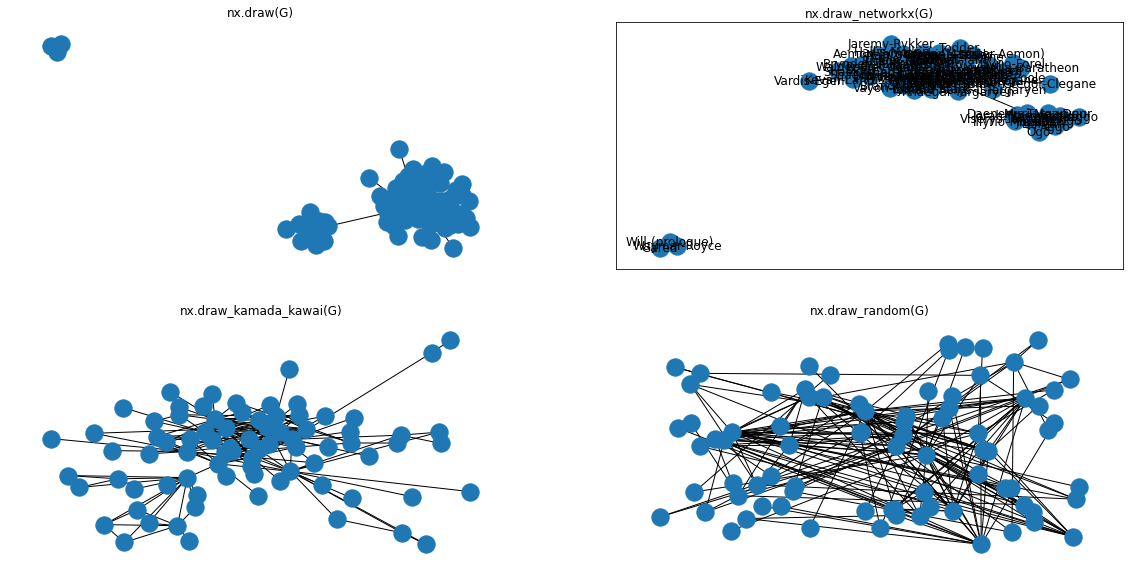

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
nx.draw(G, ax=ax[0][0])
ax[0][0].set_title('nx.draw(G)')
nx.draw_networkx(G, ax=ax[0][1])
ax[0][1].set_title('nx.draw_networkx(G)')
nx.draw_kamada_kawai(G, ax=ax[1][0])
ax[1][0].set_title('nx.draw_kamada_kawai(G)')
nx.draw_random(G, ax=ax[1][1])
ax[1][1].set_title('nx.draw_random(G)')

While the visualization option is built in the default python graph package and is quite easy to call, it's highly counter-intuitive and good only for small networks. Most of the time, with large networks, any of the inbuilt module calls doesn’t make a lot of sense. This makes the default option not the obvious choice if you are using larger network data.

Another downside, it’s not interactive so the plot is a fixed graph. This is a major drawback as there are other options which let you manually interact and play with the graph. With this cue, let’s move on to our next option.

## PyVis
PyVis is an interactive network visualization python package which takes the NetworkX graph as input. It also provides multiple styling options to customize the nodes, edges and even the complete layout. And the best part, it can be done on-the-go using a setting pane where you can play with the various options and export the final settings in form of a python dictionary. This dictionary can later be passed as config while calling the function, resulting in as-it-was drawing of the network. Apart from this, in terms of visualization, you have the basic option of zooming, selecting, hover, among others. Cool isn’t it! 😉



In [ ]:
from IPython.core.display import display, HTML # We need this because of colab
# Import pyvis
from pyvis.network import Network
# Create vis network
net = Network(notebook=True)
# Now load the networkx graph into the vis network
net.from_nx(G)
# Let's visualize the network using pyvis
net.show("GOT_SN.html")
display(HTML("GOT_SN.html"))

As we can see this new visualization is way better that the previous ones from networkx. Still, one major drawback of this options is that they are very difficult to use with interactive dashboards like Dash. This is so because apart from supporting manual interactions like select, zoom, etc, a package should automatically adjust over programmatical interactions like change in data, change in properties, etc. To overcome this drawback we are going to explore anothe option.

## Visdcc in Dash

visdcc is a port of visjs in Python. This makes it fairly easy to modify the graph or even some select properties of the graph by callbacks, which in Dash can be connected to widgets like buttons or radio select options.

A sample Dash app for our GoT dataset is shown [Here](https://github.com/imohitmayank/got_network_viz_python/blob/main/dash_app.py). Since we are in a jupyter notebook we cannot run it here. Feel free to try it on your machine.


> For more information regarding Dash please check [this](https://towardsdatascience.com/dash-for-beginners-create-interactive-python-dashboards-338bfcb6ffa4#:~:text=Dash%20is%20a%20python%20framework,dashboards%2C%20you%20only%20need%20python.) link.



In [ ]:
"""
Link: https://github.com/imohitmayank/got_network_viz_python/blob/main/dash_app.py
Author: Mohit Mayank
Idea: Plot Game of Thrones network using Visdcc in Dash.
"""
# imports
import dash
import visdcc
import pandas as pd
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

# create app
app = dash.Dash()

# load data
# df
node_list = list(set(df['Source'].unique().tolist() + df['Target'].unique().tolist()))
nodes = [{'id': node_name, 'label': node_name, 'shape': 'dot', 'size': 7} for i, node_name in enumerate(node_list)]
# create edges from df
edges = []
for row in df.to_dict(orient='records'):
    source, target = row['Source'], row['Target']
    edges.append({
        'id': source + "__" + target,
        'from': source,
        'to': target,
        'width': 2,
    })

# define layout
app.layout = html.Div([
      visdcc.Network(id = 'net', 
                     data = {'nodes': nodes, 'edges': edges},
                     options = dict(height= '600px', width= '100%')),
      dcc.RadioItems(id = 'color',
                     options=[{'label': 'Red'  , 'value': '#ff0000'},
                              {'label': 'Green', 'value': '#00ff00'},
                              {'label': 'Blue' , 'value': '#0000ff'} ],
                     value='Red'  )             
])

# define callback
@app.callback(
    Output('net', 'options'),
    [Input('color', 'value')])
def myfun(x):
    return {'nodes':{'color': x}}

# define main calling
# if __name__ == '__main__':
#   app.run_server(debug=True,use_reloader=False)

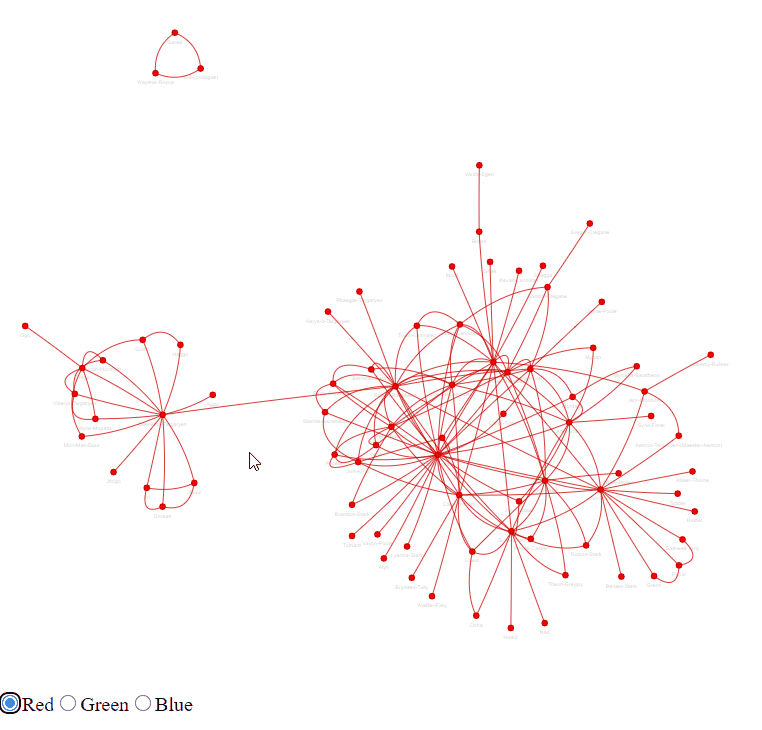

Links:
- https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259\
- https://networkx.org/documentation/latest/tutorial.html
- https://nikoleta-v3.github.io/posts/python-graphs-got/
- https://ericmjl.github.io/Network-Analysis-Made-Simple/05-casestudies/01-gameofthrones/
- https://networkofthrones.wordpress.com/